In [18]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv('reviews.csv', parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [15]:
# Data Aggregation

# Combine multiple entry for a single day into an average rating
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
day_average.head()

# Get index of above
day_average.index

plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])


AttributeError: 'DatetimeProperties' object has no attribute 'strfrtime'

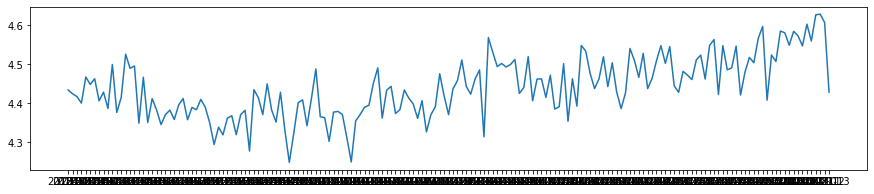

In [29]:
# Down sampling 
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
week_average

plt.figure(figsize=(15,3))
plt.plot(week_average.index, week_average['Rating'])

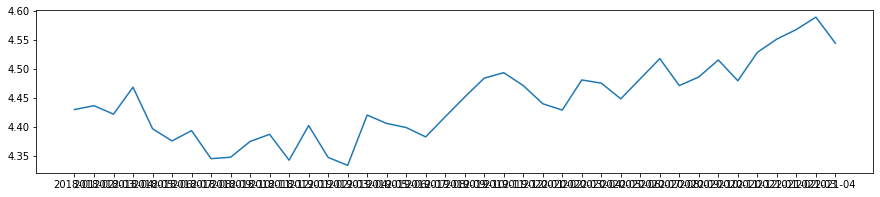

In [31]:
# Average Rating by Month
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
month_average

plt.figure(figsize=(15,3))
plt.plot(month_average.index, month_average['Rating'])

<AxesSubplot:xlabel='Month'>

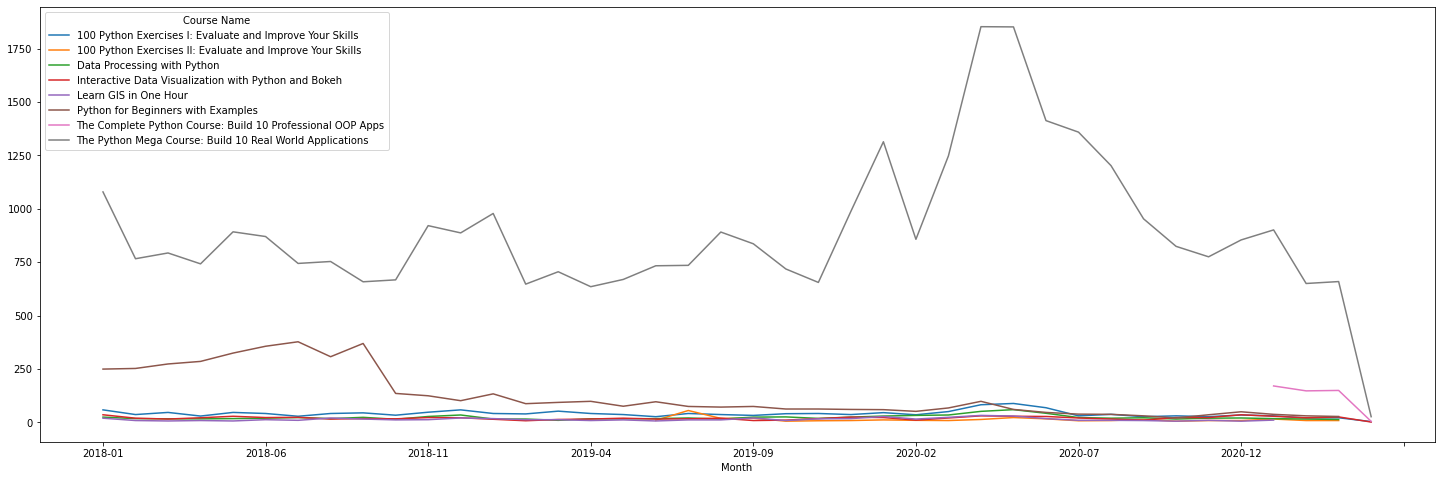

In [40]:
# Average Rating by Month by Course
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_course = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

# Plotting it!

month_average_course.plot(figsize=(25,8))

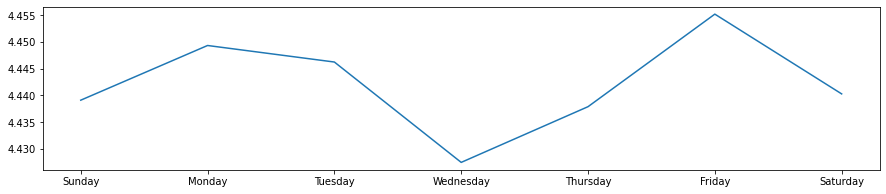

In [52]:
#What day are people happiest 
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w') 
weekday_avg = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_avg = weekday_avg.sort_values('Daynumber')
plt.figure(figsize=(15,3))
plt.plot(weekday_avg.index.get_level_values(0), weekday_avg['Rating'])

([<matplotlib.patches.Wedge at 0x1fd8a2f0df0>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

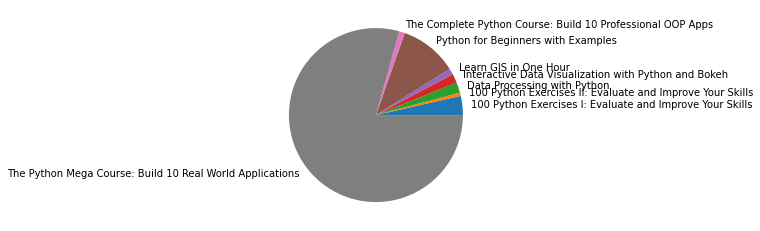

In [56]:
# Number of ratings by course
share = data.groupby(['Course Name'])['Rating'].count()
plt.pie(share, labels=share.index)